## Import Dependency

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

## Load Dataset

In [2]:
file =  '../Dataset/processed_insurance.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,age,bmi,smoker_yes,charges,charges_log
0,23,24.510,False,2396.09590,7.782013
1,21,25.745,False,3279.86855,8.095863
2,52,37.525,False,33471.97189,10.418494
3,63,41.470,False,13405.39030,9.503487
4,47,26.600,False,9715.84100,9.181616


## Prepare Data For Training Traditional Machine Learning Models

In [5]:
# Features and target
X = df[['age', 'bmi', 'smoker_yes']]  # Your input features
y = df['charges']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prepare Data For Deep Learning Model

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Traditional Machine Learning Model 

## RandomForestRegressor

In [7]:
# Record the start time for training
start_time_rf = time.time()

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Record the end time for training
end_time_rf = time.time()

# Calculate the training time
training_time_rf = end_time_rf - start_time_rf

In [8]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [9]:
# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Output the evaluation metrics and training time
print(f"Random Forest Regressor - Training Time: {training_time_rf:.2f} seconds")
print(f"Random Forest Regressor - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regressor - R² Score: {r2_rf}")

Random Forest Regressor - Training Time: 0.19 seconds
Random Forest Regressor - Mean Absolute Error (MAE): 2248.7723730312896
Random Forest Regressor - Mean Squared Error (MSE): 19088656.02659744
Random Forest Regressor - R² Score: 0.9005681123606045


In [10]:
# Display feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame to show the importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

      Feature  Importance
2  smoker_yes    0.621488
1         bmi    0.292818
0         age    0.085694


## Feed-Forward Neural Network

In [11]:
# Initialize the neural network
model = Sequential()

# Input layer with input shape as (X_train_scaled.shape[1],) for the number of features
model.add(Input(shape=(X_train_scaled.shape[1],)))

# Hidden layers
model.add(Dense(124, activation='relu')) # Rectified Linear Unit
model.add(Dense(64, activation='relu'))

# Output layer for regression (single output)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [12]:
# Create EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Record the start time for training
start_time = time.time()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=30, validation_data=(X_test_scaled, y_test), verbose=1, callbacks=[early_stopping])

# Record the end time for training
end_time = time.time()
# Calculate the training time
training_time = end_time - start_time

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 619853696.0000 - mean_absolute_error: 20188.3379 - mean_squared_error: 619853696.0000 - val_loss: 546831744.0000 - val_mean_absolute_error: 18838.0039 - val_mean_squared_error: 546831744.0000
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 619290688.0000 - mean_absolute_error: 20176.1621 - mean_squared_error: 619290688.0000 - val_loss: 545870464.0000 - val_mean_absolute_error: 18816.6113 - val_mean_squared_error: 545870464.0000
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 617405056.0000 - mean_absolute_error: 20137.8770 - mean_squared_error: 617405056.0000 - val_loss: 543044608.0000 - val_mean_absolute_error: 18758.3750 - val_mean_squared_error: 543044608.0000
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 612552512.0000 - mean_absolute_error: 20048.4004 - mean_squared_error: 612552512.0000 - val_loss: 536929984.0000 - val_mean_absolute_error: 18639.2500 - val_mean_squared_error: 536929984.0

In [13]:
# Make predictions
y_pred_nn = model.predict(X_test_scaled)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Output the evaluation metrics and training time
print(f"Neural Network - Training Time: {training_time:.2f} seconds")
print(f"Neural Network - Mean Absolute Error (MAE): {mae_nn}")
print(f"Neural Network - Mean Squared Error (MSE): {mse_nn}")
print(f"Neural Network - R² Score: {r2_nn}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Neural Network - Training Time: 10.34 seconds
Neural Network - Mean Absolute Error (MAE): 3317.773269961448
Neural Network - Mean Squared Error (MSE): 22699174.582086727
Neural Network - R² Score: 0.8817610955214333


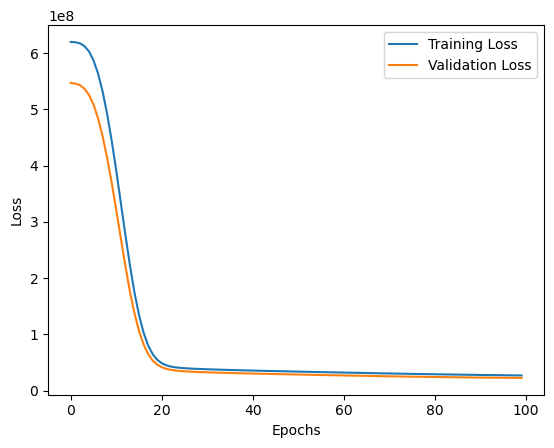

In [14]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()